In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier


In [15]:
# Importing packages and data
from time import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt



from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
data = pd.read_csv('Twitter_training.csv', names=["Tweet_ID", "Entity", "Sentiment", "Text"])
data = data[['Text','Sentiment']]
data.head()
# df_train = pd.read_csv('train.csv')#.sample(frac=1.0)
# df_test = pd.read_csv('test.csv')#.sample(frac=1.0)

,Text,Sentiment
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [42]:
import re
data = data[data.Sentiment != "Neutral"]
data = data[data.Sentiment != "Irrelevant"]
data.Text = data.Text.apply(lambda x: str(x).lower())
data.Text = data.Text.apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [49]:
tfidfvectorizer= TfidfVectorizer(stop_words='english', max_features=2000, min_df=5)
corpus = data['Text']
tfidf_matrix = tfidfvectorizer.fit_transform(corpus).toarray()

In [58]:
y= pd.get_dummies(data.Sentiment).values

In [62]:
x_train, x_test, y_train,y_test = train_test_split(tfidf_matrix, y, random_state=1, test_size=.2)

In [63]:
print(x_train.shape)
print(y_train.shape)
print(y_train.shape)
print(y_test.shape)

(34699, 2000)
(34699, 2)
(34699, 2)
(8675, 2)


In [64]:
dt = DecisionTreeClassifier(max_depth=12, random_state=1234)
rf = RandomForestClassifier(n_estimators=500,
                            max_features=0.06,
                            n_jobs=6,
                            random_state=1234)
base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06)                            
ab = AdaBoostClassifier(base_estimator=base_estim,
                        n_estimators=500,
                        learning_rate=0.5,
                        random_state=1234)

gbm = GradientBoostingClassifier(n_estimators=2000,
                                 subsample=0.67,
                                 max_features=0.06,
                                 validation_fraction=0.1,
                                 n_iter_no_change=15,
                                 verbose=0,
                                 random_state=1234)
                        
xgb = XGBClassifier(n_estimators=2000,
                    tree_method='hist',
                    subsample=0.67,
                    colsample_level=0.06,
                    verbose=0,
                    n_jobs=6,
                    random_state=1234)
lgbm = LGBMClassifier(n_estimators=2000,
                      feature_fraction=0.06,
                      bagging_fraction=0.67,
                      bagging_freq=1,
                      verbose=0,
                      n_jobs=6,
                      random_state=1234)
cb = CatBoostClassifier(n_estimators=2000,
                        colsample_bylevel=0.06,
                        max_leaves=31,
                        subsample=0.67,
                        verbose=0,
                        thread_count=6,
                        random_state=1234)
hgbm = HistGradientBoostingClassifier(max_iter=2000,
                                      validation_fraction=0.1,
                                      n_iter_no_change=15,
                                      verbose=0,
                                      random_state=1234)

In [65]:
models = [dt, rf, ab, gbm, hgbm, xgb, lgbm, cb]
model_names = [i.__class__.__name__ for i in models]

In [66]:
es_models = ['XGBClassifier',
             'LGBMClassifier',
             'CatBoostClassifier']
            

In [67]:
# Setting up our results dataframe
df_results = pd.DataFrame(columns=['accuracy', 'run_time'])

In [68]:
for m, n in zip(models, model_names):
    
    start_time = time()
    if n in es_models:
        m.fit(x_train,
              y_train,
              #eval_set = [(X_valid, y_valid)],
              early_stopping_rounds=15,
              verbose=0)
    else:
        m.fit(x_train, y_train)
    
    run_time = time() - start_time
    accuracy = np.mean(m.predict(x_test) == y_test)
        
    df_results.loc[n] = [accuracy, run_time]
    
    del m


In [14]:
df_train = df_train[["Sex", "Age", "Fare", "Survived"]]
df_test = df_test[["Sex", "Age", "Fare", "Survived"]]

KeyError: "['Survived'] not in index"

In [ ]:

df_train = pd.read_csv('train.csv')#.sample(frac=1.0)
df_test = pd.read_csv('test.csv')#.sample(frac=1.0)
# Preprocessing our data
tfidf = TfidfVectorizer(max_features=2000)
X_train = tfidf.fit_transform(df_train['text']).toarray()
X_test = tfidf.transform(df_test['text']).toarray()
y_train, y_test = df_train['negative'], df_test['negative']
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train, y_train, test_size=0.1)
# Setting up our results dataframe
df_results = pd.DataFrame(columns=['accuracy', 'run_time'])

In [4]:
!pwd

/Users/austinwilson/coding/SJSU/255/gradient-boost


In [9]:
f = open("/Users/austinwilson/Downloads/aclImdb/train/pos/12416_10.txt")

In [10]:
f.read()

'The story centers around Barry McKenzie who must go to England if he wishes to claim his inheritance. Being about the grossest Aussie shearer ever to set foot outside this great Nation of ours there is something of a culture clash and much fun and games ensue. The songs of Barry McKenzie(Barry Crocker) are highlights.'

In [16]:
from sklearn.datasets import load_boston
boston = load_boston()

/Users/austinwilson/coding/SJSU/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

In [19]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [20]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
data['PRICE'] = boston.target

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [23]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [24]:
data_dmatrix = xgb.DMatrix(data=X,label=y)



In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [26]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [27]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[16:32:12] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.517005


In [33]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [30]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680257,0.025607,21.719121,0.019025
1,19.740500,0.072068,19.818879,0.061769
2,18.007202,0.119744,18.109862,0.129375
3,16.463924,0.115086,16.587236,0.182339
4,14.990313,0.112001,15.132976,0.166282


In [31]:
print((cv_results["test-rmse-mean"]).tail(1))


49    3.862102
Name: test-rmse-mean, dtype: float64


In [37]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


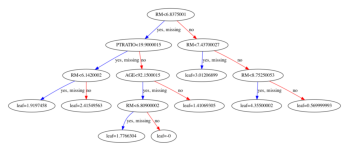

In [40]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()